In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import requests
import os
import seaborn as sns
import duckdb
from scipy import stats

In [55]:
df = pd.read_csv('../dados_limpos/dados.csv')

In [56]:
for col in ["DatGeracaoConjuntoDados","DatVencimentoTitulo","DatIncidenciaMultaMora"]:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors="coerce")

In [57]:
df.head()

,DatGeracaoConjuntoDados,Codcvnarr,AnmArrecadacao,DatVencimentoTitulo,DatIncidenciaMultaMora,QtdDiasEmAtraso,NumCPFCNPJ,SigNomAgente,DscSituacaoArrecadacao,DscSituacaoCredito,...,VlrTotPvrArr,VlrTotPagArr,VlrTotDifPvrPagArr,VlrSelic,AnoArrec,MesArrec,fatura_paga,fatura_atrasado,fatura_nao_paga,TrimestreVencimento
0,2025-11-09,858158,2005-11,2005-12-15,2005-12-16,0,1027335000166,WOBBEN WINDPOWER INDUSTRIA E COMERCIO LTDA,quitada,quitada,...,3120.38,3120.38,0.0,2.02,2005,11,1,1,0,4
1,2025-11-09,2940945,2020-10,2020-11-16,2020-11-17,0,1027335000166,WOBBEN WINDPOWER INDUSTRIA E COMERCIO LTDA,quitada,quitada,...,2549.10,2549.10,0.0,0.51,2020,10,1,1,0,4
2,2025-11-09,858158,2007-01,2007-02-15,2007-02-16,0,1027335000166,WOBBEN WINDPOWER INDUSTRIA E COMERCIO LTDA,quitada,quitada,...,1205.08,1205.08,0.0,1.80,2007,1,1,1,0,1
3,2025-11-09,2667718,2014-07,2014-08-25,2014-08-26,0,1027335000166,WOBBEN WINDPOWER INDUSTRIA E COMERCIO LTDA,quitada,quitada,...,1568.77,1568.77,0.0,1.05,2014,7,1,1,0,3
4,2025-11-09,2667718,2014-12,2015-01-15,2015-01-16,0,1027335000166,WOBBEN WINDPOWER INDUSTRIA E COMERCIO LTDA,quitada,quitada,...,1568.77,1568.77,0.0,1.00,2014,12,1,1,0,1


In [58]:
dummies_arrec = pd.get_dummies(df['DscSituacaoArrecadacao'], prefix='arrec')
dummies_cred  = pd.get_dummies(df['DscSituacaoCredito'], prefix='cred')

df = pd.concat([df, dummies_arrec, dummies_cred], axis=1)

In [59]:
df["perc_pago"] = df["VlrTotPagArr"] / df["VlrTotPvrArr"]

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415203 entries, 0 to 415202
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   DatGeracaoConjuntoDados  415203 non-null  datetime64[ns]
 1   Codcvnarr                415203 non-null  int64         
 2   AnmArrecadacao           415203 non-null  object        
 3   DatVencimentoTitulo      415203 non-null  datetime64[ns]
 4   DatIncidenciaMultaMora   415203 non-null  datetime64[ns]
 5   QtdDiasEmAtraso          415203 non-null  int64         
 6   NumCPFCNPJ               415203 non-null  int64         
 7   SigNomAgente             415203 non-null  object        
 8   DscSituacaoArrecadacao   415203 non-null  object        
 9   DscSituacaoCredito       415203 non-null  object        
 10  VlrPcpPrvArr             415203 non-null  float64       
 11  VlrTotPvrArr             415203 non-null  float64       
 12  VlrTotPagArr    

In [61]:
df.head()

,DatGeracaoConjuntoDados,Codcvnarr,AnmArrecadacao,DatVencimentoTitulo,DatIncidenciaMultaMora,QtdDiasEmAtraso,NumCPFCNPJ,SigNomAgente,DscSituacaoArrecadacao,DscSituacaoCredito,...,fatura_atrasado,fatura_nao_paga,TrimestreVencimento,arrec_cancelada,arrec_pendente,arrec_quitada,arrec_restituida,cred_pendente,cred_quitada,perc_pago
0,2025-11-09,858158,2005-11,2005-12-15,2005-12-16,0,1027335000166,WOBBEN WINDPOWER INDUSTRIA E COMERCIO LTDA,quitada,quitada,...,1,0,4,False,False,True,False,False,True,1.0
1,2025-11-09,2940945,2020-10,2020-11-16,2020-11-17,0,1027335000166,WOBBEN WINDPOWER INDUSTRIA E COMERCIO LTDA,quitada,quitada,...,1,0,4,False,False,True,False,False,True,1.0
2,2025-11-09,858158,2007-01,2007-02-15,2007-02-16,0,1027335000166,WOBBEN WINDPOWER INDUSTRIA E COMERCIO LTDA,quitada,quitada,...,1,0,1,False,False,True,False,False,True,1.0
3,2025-11-09,2667718,2014-07,2014-08-25,2014-08-26,0,1027335000166,WOBBEN WINDPOWER INDUSTRIA E COMERCIO LTDA,quitada,quitada,...,1,0,3,False,False,True,False,False,True,1.0
4,2025-11-09,2667718,2014-12,2015-01-15,2015-01-16,0,1027335000166,WOBBEN WINDPOWER INDUSTRIA E COMERCIO LTDA,quitada,quitada,...,1,0,1,False,False,True,False,False,True,1.0


In [62]:
df.to_parquet("../dados_limpos/dataset_tidy.parquet", index=False)

In [63]:
con = duckdb.connect(database='../dados_limpos/dataset_tidy.parquet', read_only=False)
con.register("df_tidy", df)


In [64]:
q1 = """
WITH base AS (
  SELECT
    EXTRACT(year  FROM DatVencimentoTitulo) AS ano,
    EXTRACT(month FROM DatVencimentoTitulo) AS mes,
    SUM(VlrTotPvrArr) AS soma_previsto,
    SUM(VlrTotPagArr) AS soma_pago
  FROM df_tidy
  GROUP BY ano, mes
)
SELECT 
    ano,
    mes,
    soma_previsto,
    soma_pago,
    CASE WHEN soma_previsto = 0 THEN NULL ELSE soma_pago/soma_previsto END AS proporcao_media
FROM base
ORDER BY ano, mes;
"""

t1 = con.execute(q1).fetchdf()
display(t1.head(12))


,ano,mes,soma_previsto,soma_pago,proporcao_media
0,2005,2,43504850.91,1.937609e+07,0.445378
1,2005,3,19971433.62,1.990396e+07,0.996622
2,2005,4,20226065.24,2.015994e+07,0.996731
3,2005,5,25071031.05,2.500554e+07,0.997388
4,2005,6,25315449.92,2.524993e+07,0.997412
5,2005,7,26039366.87,2.595288e+07,0.996679
6,2005,8,27953697.68,2.785623e+07,0.996513
7,2005,9,32287097.93,3.009675e+07,0.932160
8,2005,10,30597461.12,3.050727e+07,0.997052
9,2005,11,31671850.09,3.156966e+07,0.996774


In [65]:
q2 = """
SELECT
    TrimestreVencimento AS trimestre,
    AVG(QtdDiasEmAtraso) AS atraso_medio,
    AVG(perc_pago) AS perc_pago_medio,
    COUNT(*) AS total_registros
FROM df_tidy
GROUP BY trimestre
ORDER BY trimestre;
"""

t2 = con.execute(q2).fetchdf()
display(t2)


,trimestre,atraso_medio,perc_pago_medio,total_registros
0,1,6.471668,0.985067,101951
1,2,5.468868,0.985597,105070
2,3,4.748060,0.982654,105787
3,4,4.805625,0.951252,102395


In [66]:
q3 = """
SELECT
  CASE
    WHEN arrec_quitada THEN 'quitada'
    WHEN arrec_cancelada THEN 'cancelada'
    WHEN arrec_restituida THEN 'restituida'
    WHEN arrec_pendente THEN 'pendente'
    ELSE 'desconhecido'
  END AS status,
  VlrTotPvrArr,
  PERCENT_RANK() OVER (
    PARTITION BY 
      CASE
        WHEN arrec_quitada THEN 'quitada'
        WHEN arrec_cancelada THEN 'cancelada'
        WHEN arrec_restituida THEN 'restituida'
        WHEN arrec_pendente THEN 'pendente'
        ELSE 'desconhecido'
      END
    ORDER BY VlrTotPvrArr
  ) AS pr_status
FROM df_tidy
WHERE VlrTotPvrArr IS NOT NULL;
"""

t3 = con.execute(q3).fetchdf()
display(t3.head(10))


,status,VlrTotPvrArr,pr_status
0,pendente,0.18,0.000000
1,pendente,0.31,0.000127
2,pendente,0.83,0.000254
3,pendente,0.83,0.000254
4,pendente,0.83,0.000254
5,pendente,0.83,0.000254
6,pendente,0.83,0.000254
7,pendente,0.85,0.000889
8,pendente,0.85,0.000889
9,pendente,0.85,0.000889


In [67]:
q4 = """
WITH base AS (
  SELECT
    AnoArrec AS ano,
    VlrTotPvrArr,
    ROW_NUMBER() OVER (
        PARTITION BY AnoArrec
        ORDER BY VlrTotPvrArr DESC
    ) AS rk
  FROM df_tidy
  WHERE VlrTotPvrArr IS NOT NULL
)
SELECT *
FROM base
WHERE rk <= 10
ORDER BY ano, rk;
"""

t4 = con.execute(q4).fetchdf()
display(t4)


,ano,VlrTotPvrArr,rk
0,2005,11741802.59,1
1,2005,4809520.44,2
2,2005,4561165.00,3
3,2005,1843887.19,4
4,2005,1843887.19,5
...,...,...,...
205,2025,4036165.16,6
206,2025,4036165.16,7
207,2025,4036165.16,8
208,2025,4036165.16,9


In [68]:
q5 = """
SELECT
    CORR(perc_pago, QtdDiasEmAtraso) AS correlacao_perc_atraso
FROM df_tidy
WHERE perc_pago IS NOT NULL
  AND QtdDiasEmAtraso IS NOT NULL;
"""

t5 = con.execute(q5).fetchdf()
display(t5)


,correlacao_perc_atraso
0,0.019783


In [69]:
q6 = """
SELECT
    CORR(VlrTotPvrArr, QtdDiasEmAtraso) AS correlacao_previsto_atraso
FROM df_tidy
WHERE VlrTotPvrArr IS NOT NULL
  AND QtdDiasEmAtraso IS NOT NULL;
"""

t6 = con.execute(q6).fetchdf()
display(t6)


,correlacao_previsto_atraso
0,-0.012992


In [70]:
q7 = """
SELECT *
FROM df_tidy
WHERE VlrTotPvrArr > 0
  AND VlrTotPagArr > 1.1 * VlrTotPvrArr
LIMIT 20;
"""

t7 = con.execute(q7).fetchdf()
display(t7)


,DatGeracaoConjuntoDados,Codcvnarr,AnmArrecadacao,DatVencimentoTitulo,DatIncidenciaMultaMora,QtdDiasEmAtraso,NumCPFCNPJ,SigNomAgente,DscSituacaoArrecadacao,DscSituacaoCredito,...,fatura_atrasado,fatura_nao_paga,TrimestreVencimento,arrec_cancelada,arrec_pendente,arrec_quitada,arrec_restituida,cred_pendente,cred_quitada,perc_pago
0,2025-11-09,858158,2009-02,2009-03-15,2009-03-16,89,55109474000168,USINA CAROLO S/A - ACUCAR E ALCOOL.,quitada,quitada,...,1,0,1,False,False,True,False,False,True,1.150000
1,2025-11-09,858158,2009-03,2009-04-15,2009-04-16,64,55109474000168,USINA CAROLO S/A - ACUCAR E ALCOOL.,quitada,quitada,...,1,0,2,False,False,True,False,False,True,1.150000
2,2025-11-09,2940945,2024-05,2024-06-17,2024-06-18,80,21915308000137,Paraiso PARAISO HIDRELETRICA S.A,quitada,quitada,...,1,0,2,False,False,True,False,False,True,1.150000
3,2025-11-09,2940945,2021-03,2021-04-15,2021-04-16,0,26896005000138,GSTE GIOVANNI SANGUINETTI TRAN...,quitada,quitada,...,1,0,2,False,False,True,False,False,True,1.112300
4,2025-11-09,2940945,2022-01,2022-02-15,2022-02-16,0,22343394000113,PCH AGUAS DO RIO IRANI ENERGETICA SPE LTDA,quitada,quitada,...,1,0,1,False,False,True,False,False,True,1.150000
5,2025-11-09,858158,2009-11,2009-12-15,2009-12-16,0,64132236000164,Cimento Rio Branco S.A,quitada,quitada,...,1,0,4,False,False,True,False,False,True,1.126552
6,2025-11-09,858158,2009-10,2009-11-16,2009-11-17,0,64132236000164,Cimento Rio Branco S.A,quitada,quitada,...,1,0,4,False,False,True,False,False,True,1.121429
7,2025-11-09,2667718,2015-04,2015-05-15,2015-05-16,0,64132236000164,Cimento Rio Branco S.A,quitada,quitada,...,1,0,2,False,False,True,False,False,True,1.150000
8,2025-11-09,2940945,2023-02,2023-03-15,2023-03-16,7,23037442000108,VENTOS DE SANTO APOLINARIO ENERGIAS RENOVAVEIS...,quitada,quitada,...,1,0,1,False,False,True,False,False,True,1.100088
9,2025-11-09,2940945,2023-02,2023-03-15,2023-03-16,7,23037375000121,VENTOS DE SAO CRISPIM I ENERGIAS RENOVAVEIS S/A,quitada,quitada,...,1,0,1,False,False,True,False,False,True,1.100088


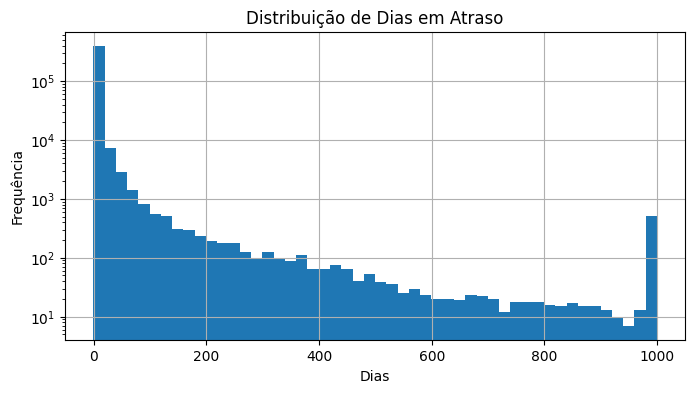

In [76]:
plt.figure(figsize=(8,4))
df['QtdDiasEmAtraso'].hist(bins=50)
plt.title("Distribuição de Dias em Atraso")
plt.xlabel("Dias")
plt.ylabel("Frequência")
plt.yscale('log')
plt.show()


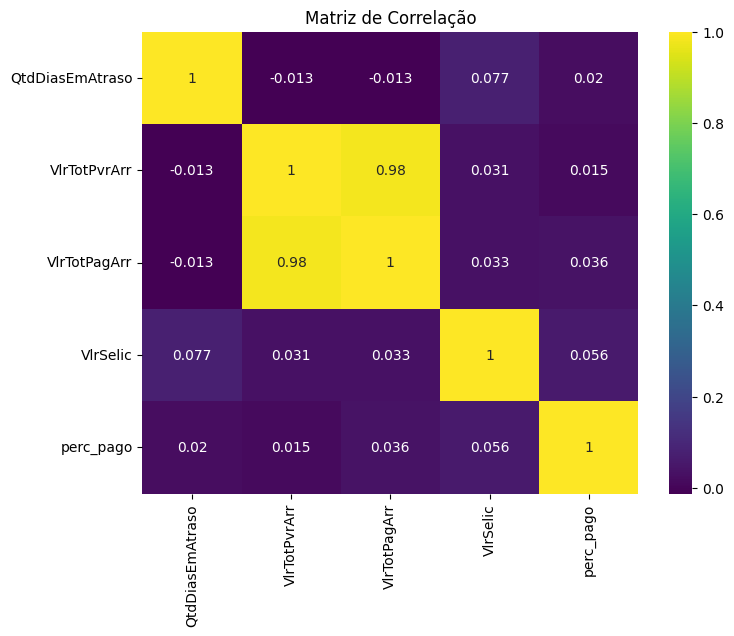

In [77]:
cols = ['QtdDiasEmAtraso','VlrTotPvrArr','VlrTotPagArr','VlrSelic','perc_pago']
corr = df[cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="viridis")
plt.title("Matriz de Correlação")
plt.show()
